# Linear Regression

### Dataset
The  dataset used for this demostration contains data about people and their insurance premium. Based on a number of factors, their insurance is deicided.

In [38]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
data_df = pd.read_csv('../Datasets/Insurance.csv')
pd.set_option('display.max_columns', None)

In [40]:
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
data_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values.

In [42]:
y = data_df['charges']
X = data_df.drop(['charges'], axis=1)

In [43]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y, random_state=0)

In [44]:
print('Shape of training data and prediction: {}'.format(train_X.shape))
print('Shape of testing data and prediction: {}'.format(test_X.shape))

Shape of training data and prediction: (1003, 6)
Shape of testing data and prediction: (335, 6)


### Basic EDA

Merging train_X, train_y to perform EDA

In [73]:
train =  pd.concat([train_X,train_y], axis=1)

In [74]:
train.shape

(1003, 9)

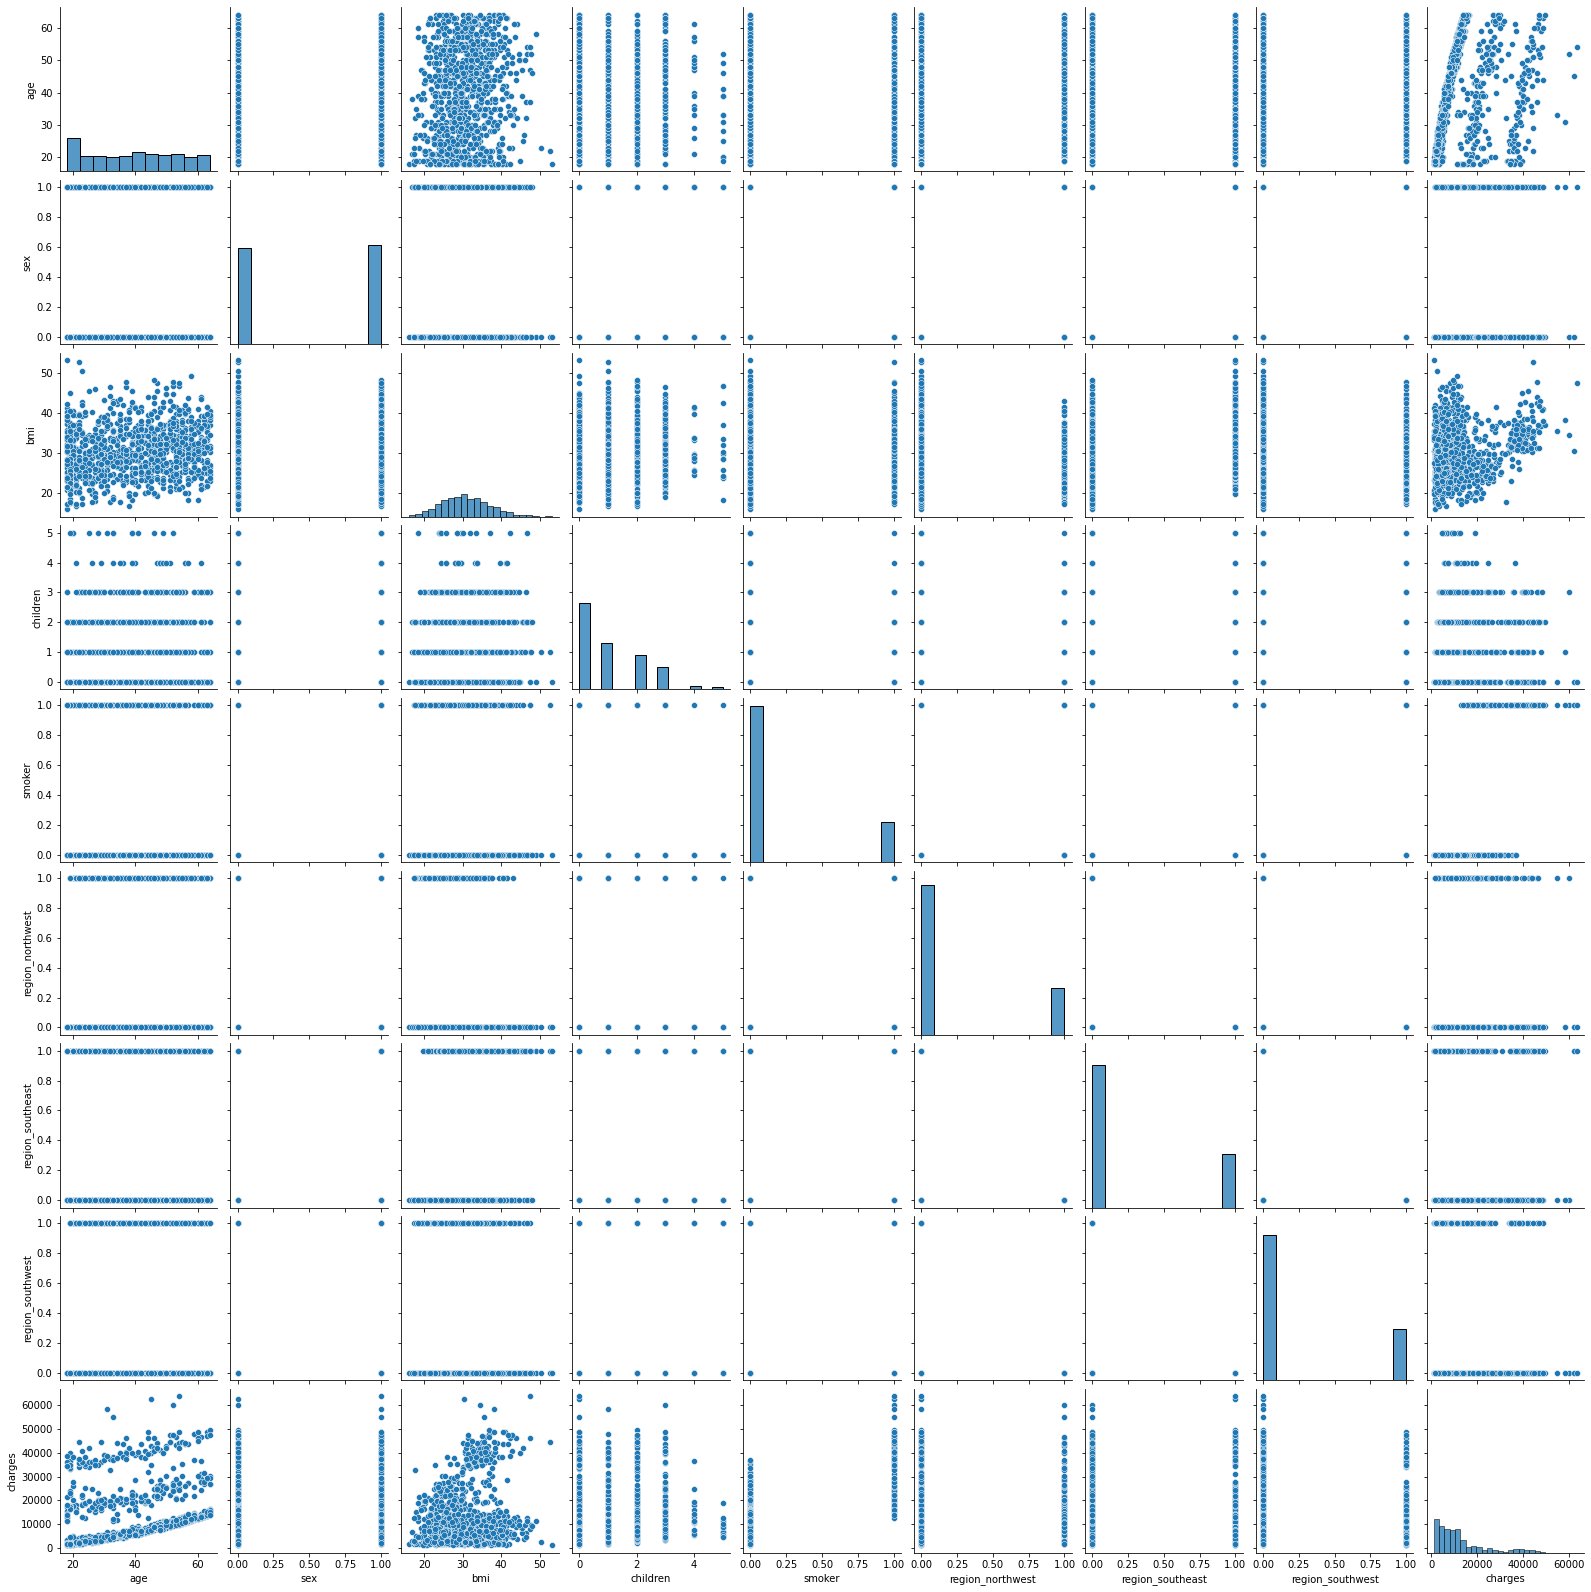

In [75]:
sns.pairplot(train)

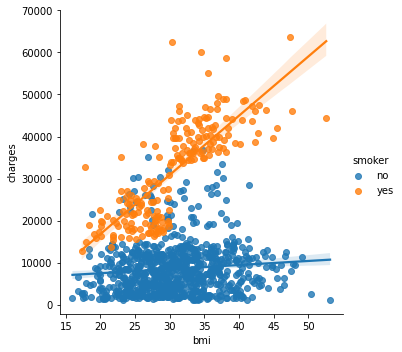

In [47]:
sns.lmplot(data=train, x='bmi', y='charges', hue='smoker')

<AxesSubplot:xlabel='age', ylabel='charges'>

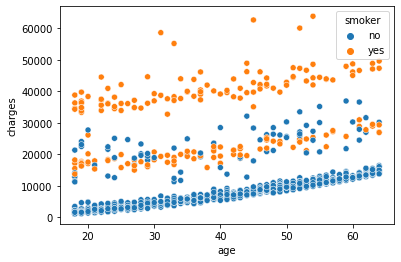

In [48]:
sns.scatterplot(data=train, x='age', y='charges', hue='smoker')

In [49]:
train[train.charges.values > 50000]

,age,sex,bmi,children,smoker,region,charges
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1300,45,male,30.360,0,yes,southeast,62592.87309
543,54,female,47.410,0,yes,southeast,63770.42801


<AxesSubplot:xlabel='smoker', ylabel='charges'>

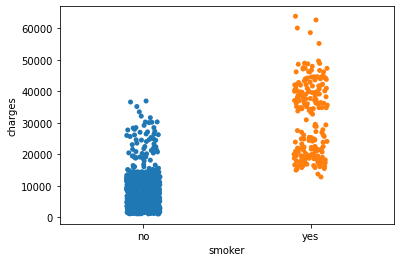

In [50]:
sns.stripplot(data=train, x='smoker', y='charges')

### Feature Engineering on training dataset

In [51]:
train_X['sex'] = train_X.sex.replace(['male','female'],[0,1])
train_X['smoker'] = train_X.smoker.replace(['no','yes'],[0,1])

In [52]:
train_X.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
dtype: object

In [53]:
test_X['sex'] = test_X.sex.replace(['male','female'],[0,1])
test_X['smoker'] = test_X.smoker.replace(['no','yes'],[0,1])

In [54]:
train_X.region.unique()

array(['southeast', 'northeast', 'southwest', 'northwest'], dtype=object)

In [55]:
nrow_train = len(train_X)
train = pd.concat([train_X,test_X], axis = 0)

In [56]:
train = pd.get_dummies(train, columns=['region'], drop_first= True)

In [57]:
train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [58]:
train_X = train[:nrow_train]
test_X = train[nrow_train:]

In [59]:
test_X.shape

(335, 8)

In [60]:
test_X

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
578,52,0,30.200,1,0,0,0,1
610,47,1,29.370,1,0,0,1,0
569,48,0,40.565,2,1,1,0,0
1034,61,0,38.380,0,0,1,0,0
198,51,1,18.050,0,0,1,0,0
...,...,...,...,...,...,...,...,...
574,57,1,34.295,2,0,0,0,0
1174,29,0,32.110,2,0,1,0,0
1327,51,0,30.030,1,0,0,1,0
817,23,0,37.100,3,0,0,0,1


In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [63]:
model.fit(train_X,train_y)

LinearRegression()

In [65]:
preds = model.predict(test_X)

In [66]:
from sklearn.metrics import mean_absolute_error as mae

print(mae(test_y,preds))

4012.715276853085
